# **Loantap-CaseStudy**

**Problem Statement:**
  
LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

Personal Loan EMI Free Loan Personal Overdraft Advance Salary Loan This case study will focus on the underwriting process behind Personal Loan only

Understanding the data
loan_amnt : The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

term : The number of payments on the loan. Values are in months and can be either 36 or 60.

int_rate : Interest Rate on the loan

installment : The monthly payment owed by the borrower if the loan originates.

grade : LoanTap assigned loan grade

sub_grade : LoanTap assigned loan subgrade

emp_title :The job title supplied by the Borrower when applying for the loan.*

emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.

annual_inc : The self-reported annual income provided by the borrower during registration.

verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified

issue_d : The month which the loan was funded

loan_status : Current status of the loan - Target Variable

purpose : A category provided by the borrower for the loan request.

title : The loan title provided by the borrower

dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.

earliest_cr_line :The month the borrower's earliest reported credit line was opened

open_acc : The number of open credit lines in the borrower's credit file.

pub_rec : Number of derogatory public records

revol_bal : Total credit revolving balance

revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

total_acc : The total number of credit lines currently in the borrower's credit file

initial_list_status : The initial listing status of the loan. Possible values are – W, F

application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers

mort_acc : Number of mortgage accounts.

pub_rec_bankruptcies : Number of public record bankruptcies

Address: Address of the individual

In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, ConfusionMatrixDisplay, RocCurveDisplay
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
import warnings

In [111]:
df = pd.read_csv("/content/sample_data/logistic_regression.csv")
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [112]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


**Insights:**

There is significant difference found in the mean and median of the following attributes loan_amnt terms installment revol_bal etc.

These attributes might contain

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [114]:
for i in df.columns:
    print(i, '-->> ', df[i].unique(), '\n')

loan_amnt -->>  [10000.  8000. 15600. ... 36275. 36475.   725.] 

term -->>  [' 36 months' ' 60 months'] 

int_rate -->>  [11.44 11.99 10.49  6.49 17.27 13.33  5.32 11.14 10.99 16.29 13.11 14.64
  9.17 12.29  6.62  8.39 21.98  7.9   6.97  6.99 15.61 11.36 13.35 12.12
  9.99  8.19 18.75  6.03 14.99 16.78 13.67 13.98 16.99 19.91 17.86 21.49
 12.99 18.54  7.89 17.1  18.25 11.67  6.24  8.18 12.35 14.16 17.56 18.55
 22.15 10.39 15.99 16.07 24.99  9.67 19.19 21.   12.69 10.74  6.68 19.22
 11.49 16.55 19.97 24.7  13.49 18.24 16.49 25.78 25.83 18.64  7.51 13.99
 15.22 15.31  7.69 19.53 10.16  7.62  9.75 13.68 15.88 14.65  6.92 23.83
 10.75 18.49 20.31 17.57 27.31 19.99 22.99 12.59 10.37 14.33 13.53 22.45
 24.5  17.99  9.16 12.49 11.55 17.76 28.99 23.1  20.49 22.7  10.15  6.89
 19.52  8.9  14.3   9.49 25.99 24.08 13.05 14.98 16.59 11.26 25.89 14.48
 21.99 23.99  5.99 14.47 11.53  8.67  8.59 10.64 23.28 25.44  9.71 16.2
 19.24 24.11 15.8  15.96 14.49 18.99  5.79 19.29 14.54 14.09  9.25 19.05
 17

**Null Value Check**

In [115]:
#persentage of data missing in each columns
round((df.isnull().sum()*100)/(len(df)), 2)

loan_amnt               0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               5.79
emp_length              4.62
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.44
dti                     0.00
earliest_cr_line        0.00
open_acc                0.00
pub_rec                 0.00
revol_bal               0.00
revol_util              0.07
total_acc               0.00
initial_list_status     0.00
application_type        0.00
mort_acc                9.54
pub_rec_bankruptcies    0.14
address                 0.00
dtype: float64

In [117]:
df.dropna(inplace=True)

In [118]:
df.shape

(335868, 27)

**Duplicate Check**

In [119]:
df.duplicated().sum()

0

**There are no duplicates in the dataset**

# **Univariate Analysis**

In [120]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [121]:
float_columns = df.select_dtypes(include=['float64']).columns
float_columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [122]:
df_float = df[float_columns]
df_float

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
0,10000.0,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0
1,8000.0,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0
2,15600.0,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0
3,7200.0,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0
4,24375.0,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
396024,6000.0,13.11,202.49,64000.0,10.81,7.0,0.0,11456.0,97.1,9.0,0.0,0.0
396025,10000.0,10.99,217.38,40000.0,15.63,6.0,0.0,1990.0,34.3,23.0,0.0,0.0
396026,21000.0,12.29,700.42,110000.0,21.45,6.0,0.0,43263.0,95.7,8.0,1.0,0.0
396027,5000.0,9.99,161.32,56500.0,17.56,15.0,0.0,32704.0,66.9,23.0,0.0,0.0


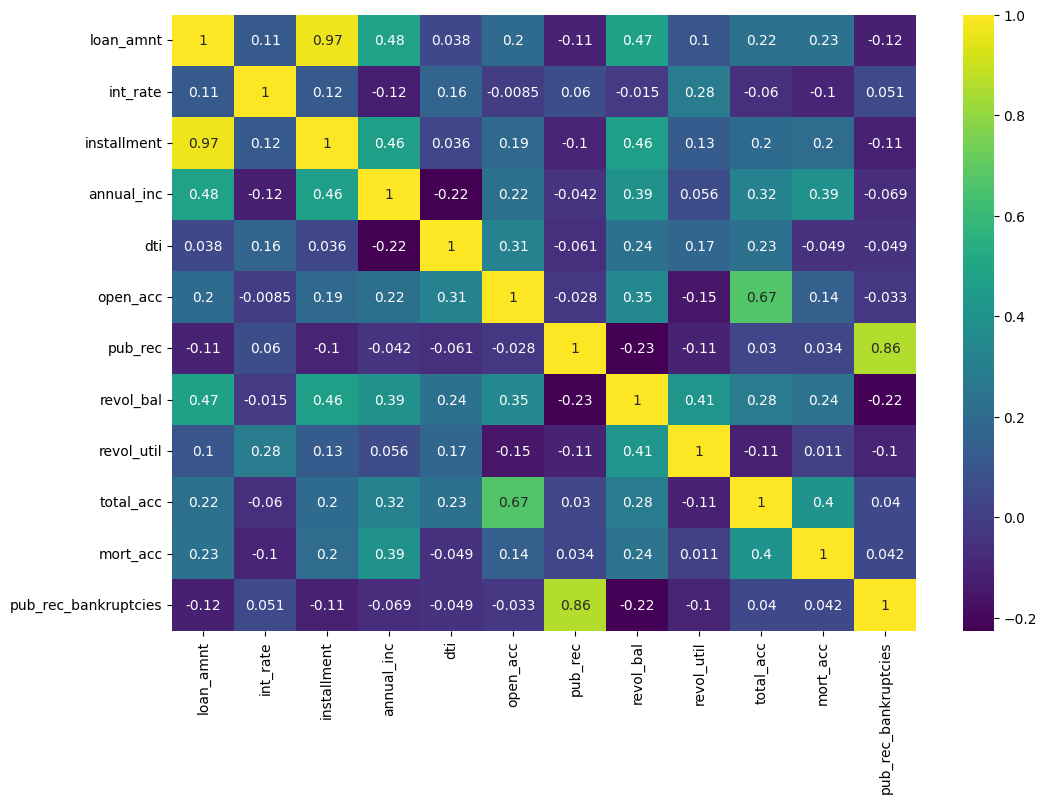

In [123]:
plt.figure(figsize=(12,8))
sns.heatmap(df_float.corr(method='spearman'),annot=True,cmap='viridis')
plt.show()

It has been noticed there is almost perfect correlation (i.e. 0.97) between "loan_amnt" the "installment" feature.

**Installment:** The monthly payment owed by the borrower if the loan originates. loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. So, we can drop either one of those columns.

Hence, we are dropping installment feature in order to view the correlation between other features and loan amount.

In [124]:
df.drop(columns=['installment'],axis=1,inplace=True)
df_float.drop(columns=['installment'],axis=1,inplace=True)

<ipython-input-124-89853ae2fc3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_float.drop(columns=['installment'],axis=1,inplace=True)


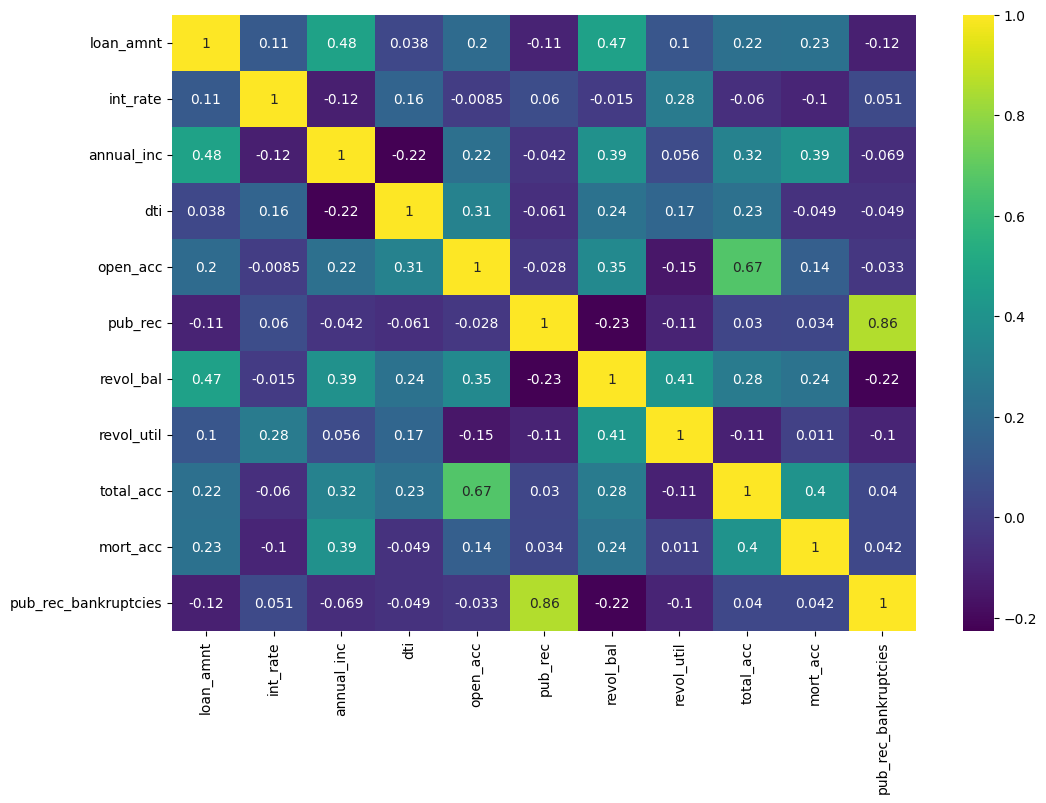

In [125]:
plt.figure(figsize=(12,8))
sns.heatmap(df_float.corr(method='spearman'),annot=True,cmap='viridis')
plt.show()

In [129]:
univariate_columns = df.select_dtypes('float64').columns.tolist()

In [130]:
univariate_columns

['loan_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies']

**Distribution of Univariate Columns (KDE Plot)**

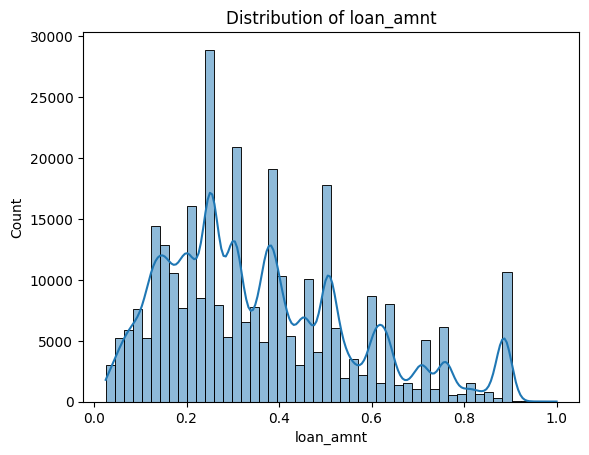

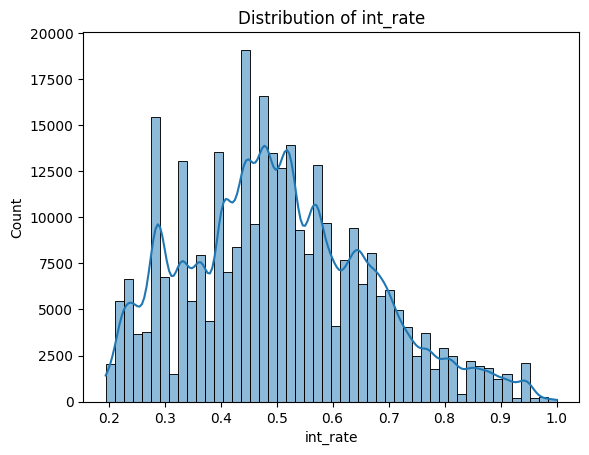

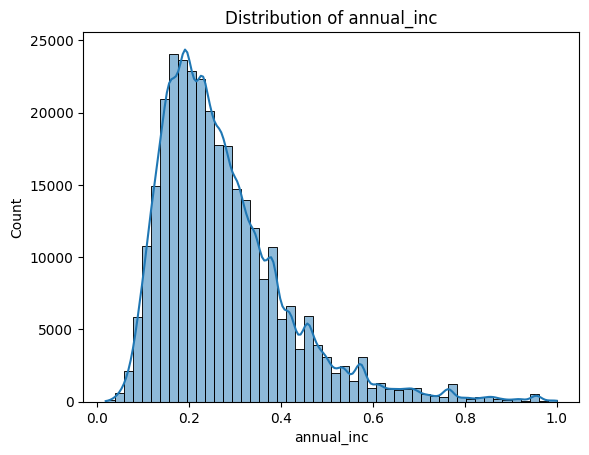

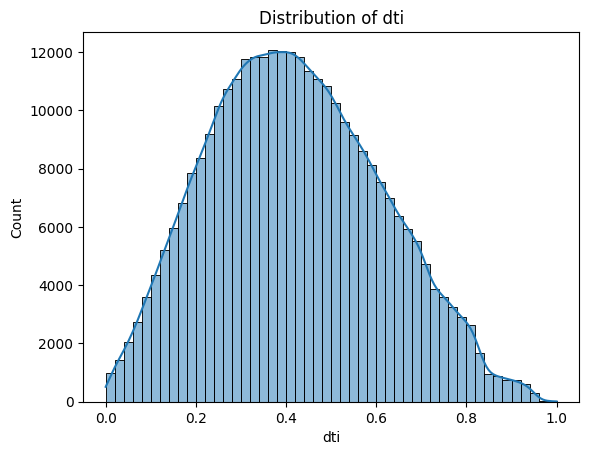

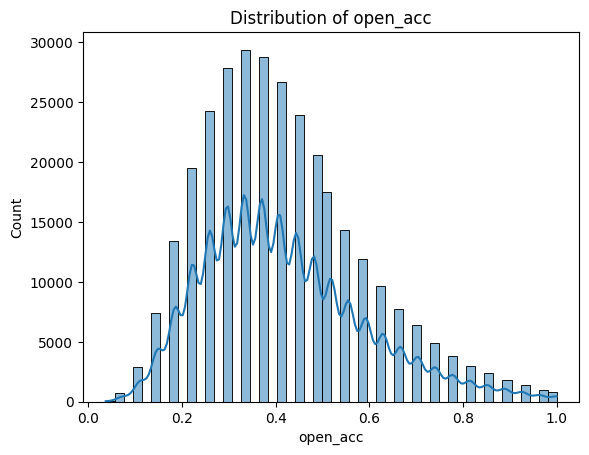

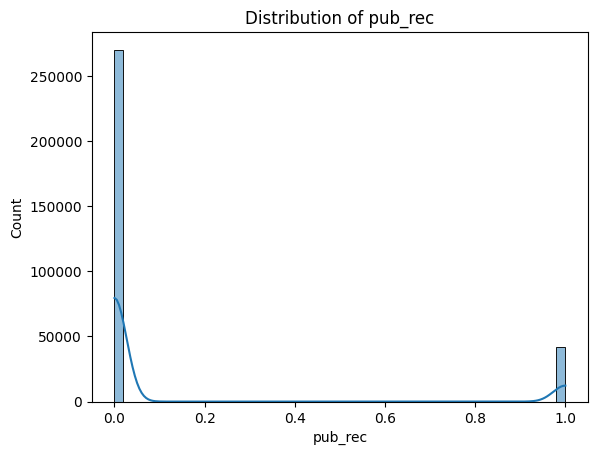

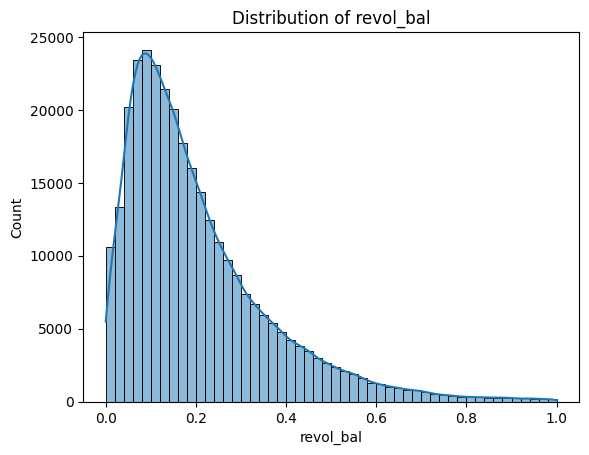

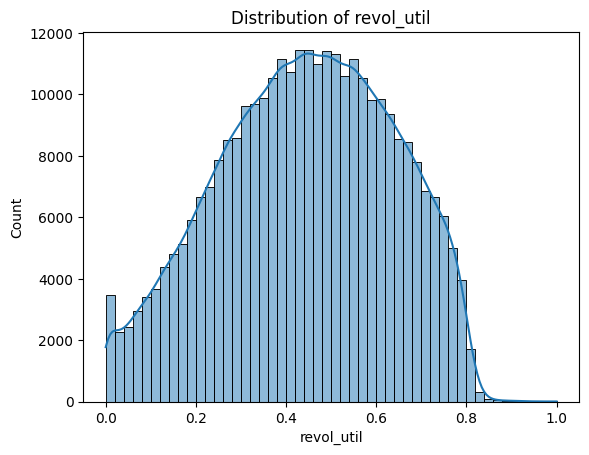

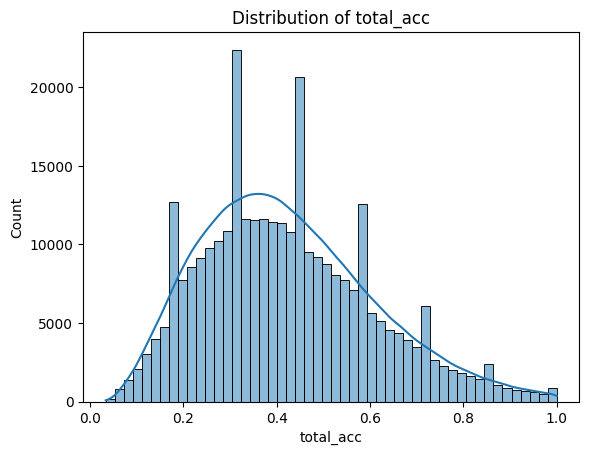

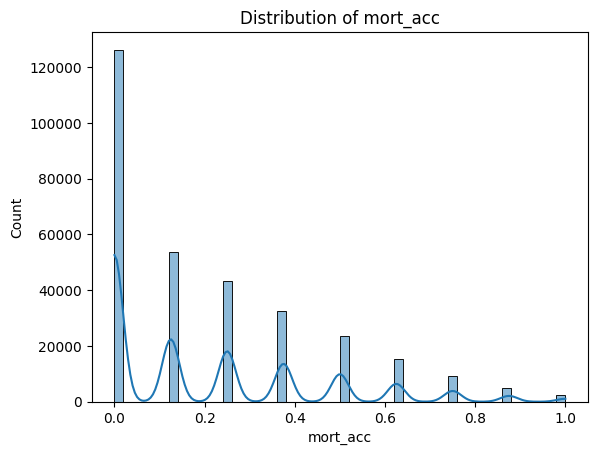

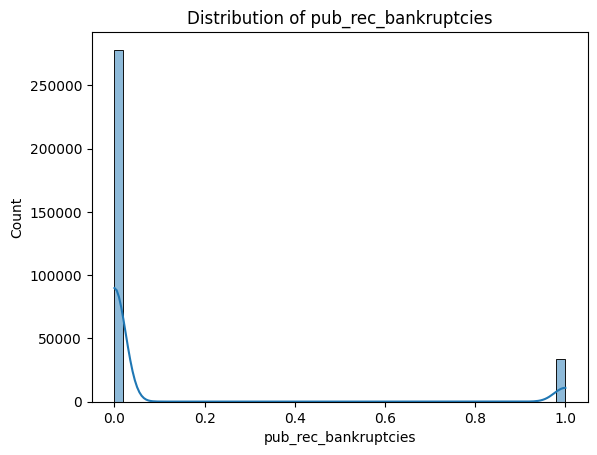

In [131]:
for i in univariate_columns:
#     plt.figure(figsize=(12,5))
    plt.title("Distribution of {}".format(i))
    sns.histplot(df[i]/df[i].max(), kde=True, bins=50)
    plt.show()

**Insights**

Most of the distribution is highly skewed which tells us that they might contain outliers
Almost all the continuous features have outliers present in the dataset.

**Distribution of Categorical Values (Countplot)**

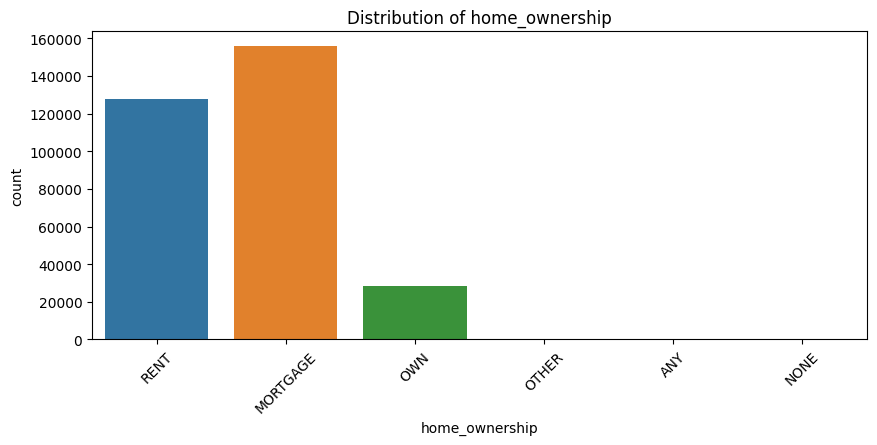

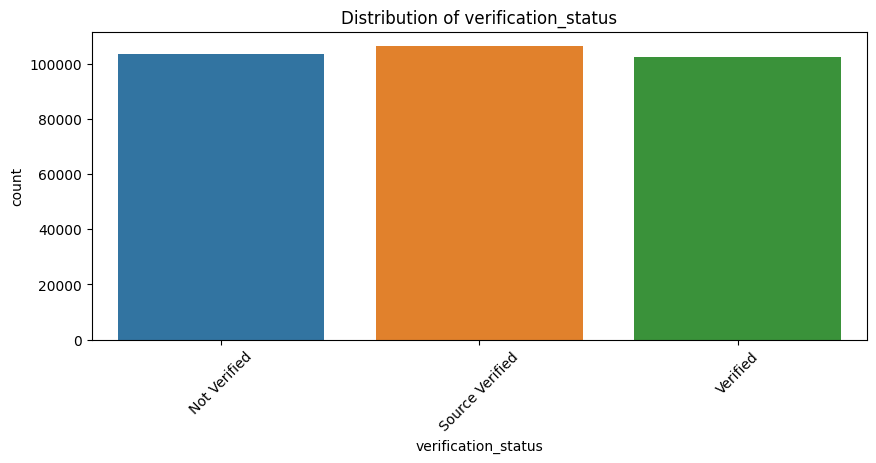

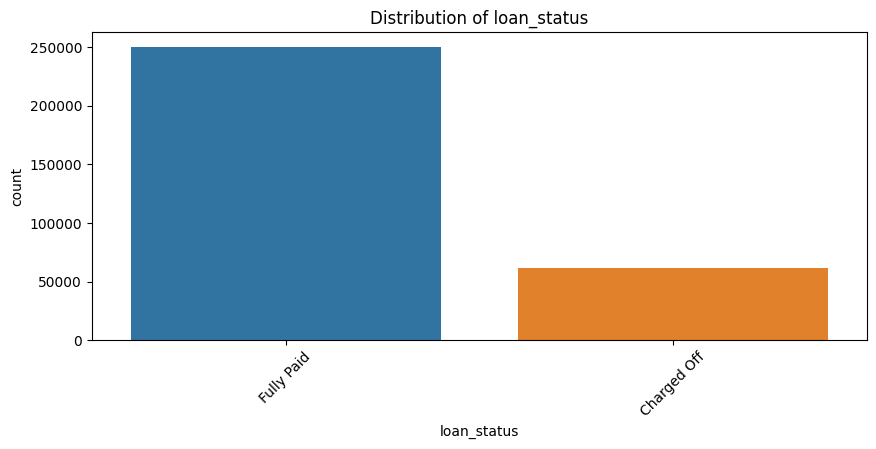

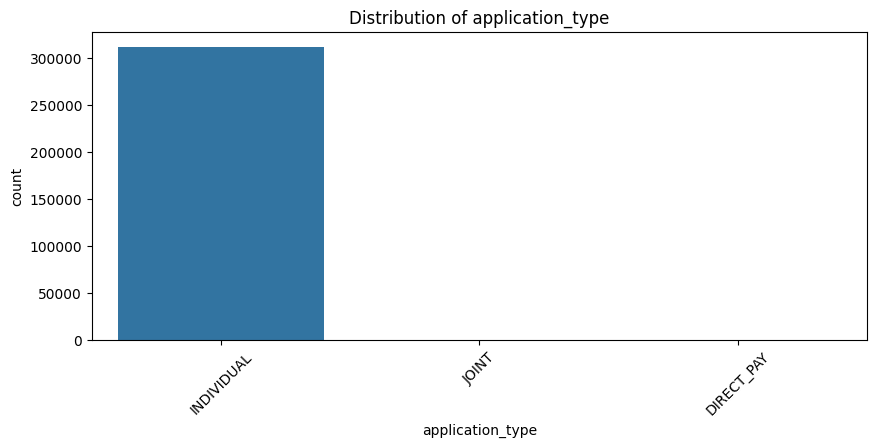

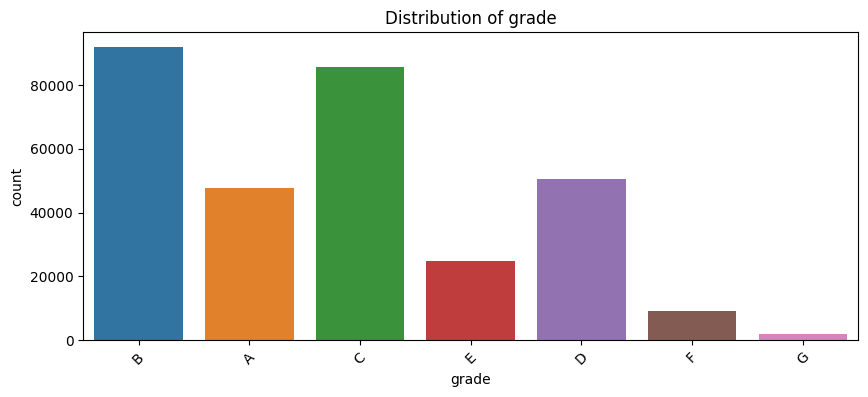

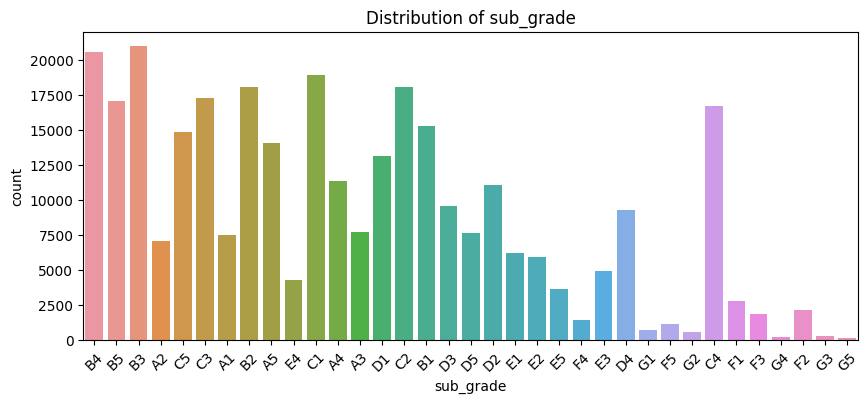

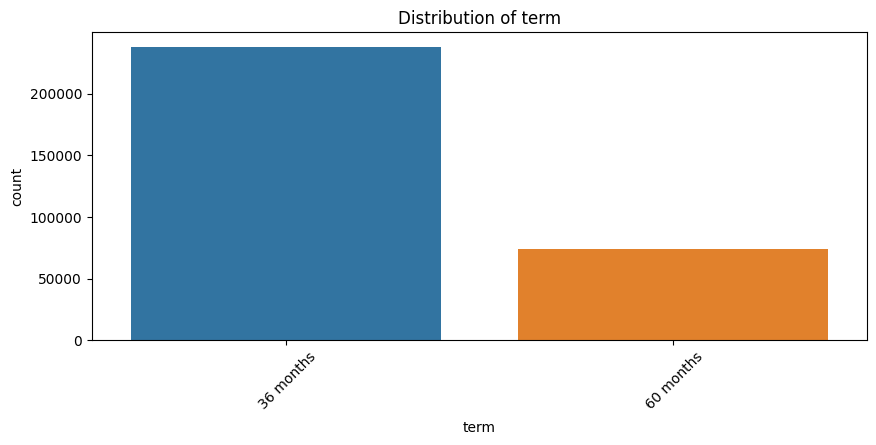

In [132]:
cat_vars = ['home_ownership', 'verification_status', 'loan_status', 'application_type', 'grade', 'sub_grade', 'term']
for i in cat_vars:
    plt.figure(figsize=(10, 4))
    plt.title(f'Distribution of {i}')
    sns.countplot(data=df, x=i)
    plt.xticks(rotation = 45)
    plt.show()

**Insights**

All the application type is Individual
Most of the loan tenure is disbursed for 36 months
The grade of majority of people those who have took the loan is 'B' and have subgrade 'B3'.
So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

# **Visualization - Bivariate Analysis**

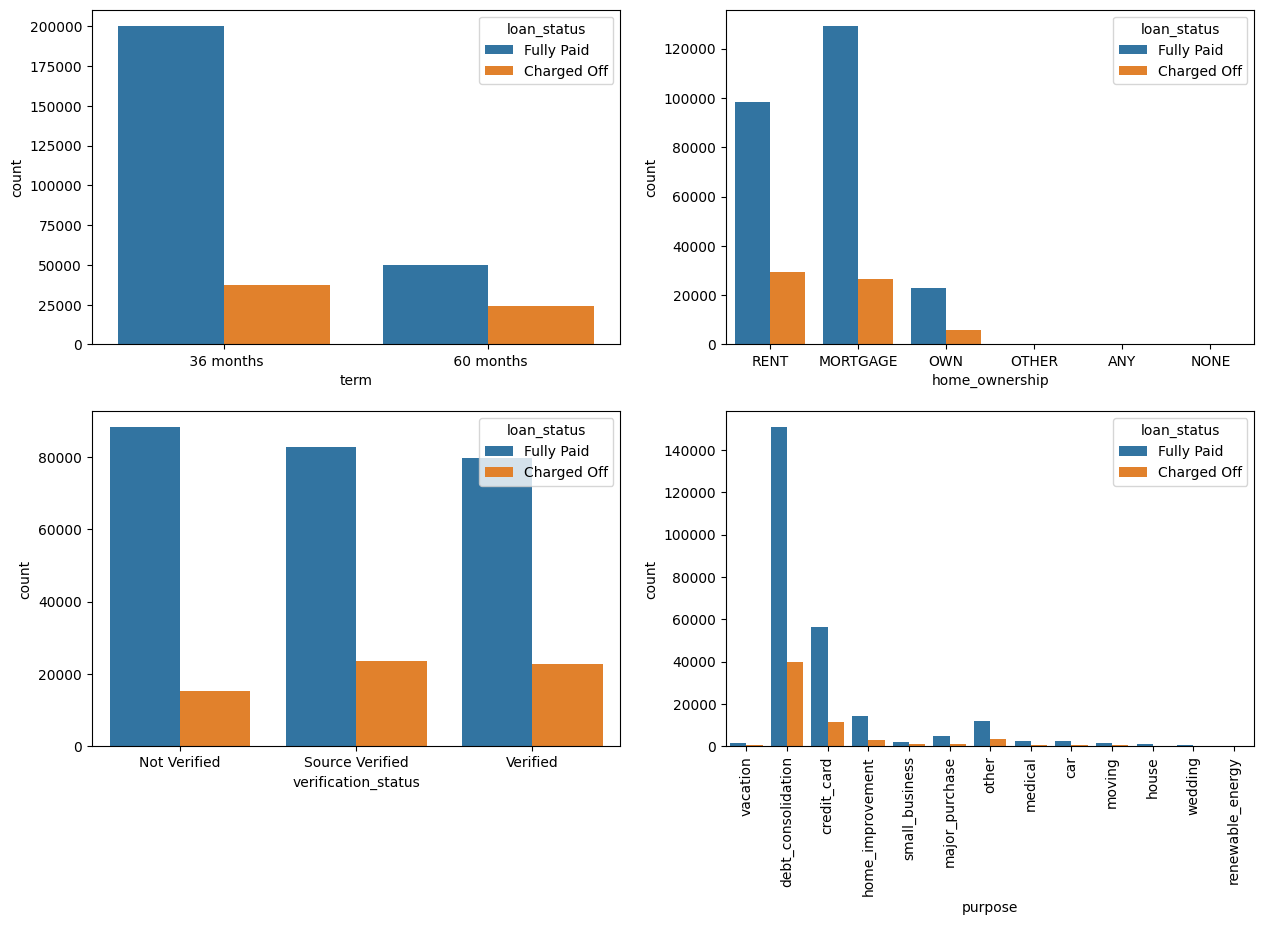

In [133]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(4,2,4)
g=sns.countplot(x='purpose',data=df,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.show()

**Insights**

Most of the people took loan for 36 months and full paid on time
Most of people have home ownership as mortgage and rent
Most of the people took loan for debt consolidations

4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)

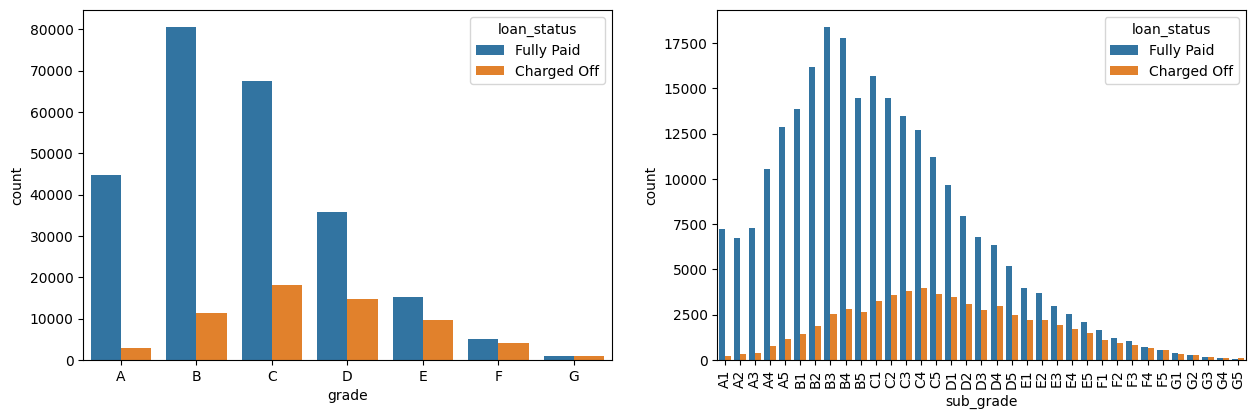

In [134]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

plt.show()

**Insights**

All the application type is Individual

Most of the loan tenure is disbursed for 36 months

The grade of majority of people those who have took the loan is 'B' and have subgrade 'B3'.

So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

Most of the people took loan for 36 months and full paid on time

Most of people have home ownership as mortgage and rent

Most of the people took loan for debt consolidations

All the application type is Individual Most of the loan tenure is disbursed for 36 months The grade of majority of people those who have took the loan is 'B' and have subgrade 'B3'. So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

5. Name the top 2 afforded job titles.

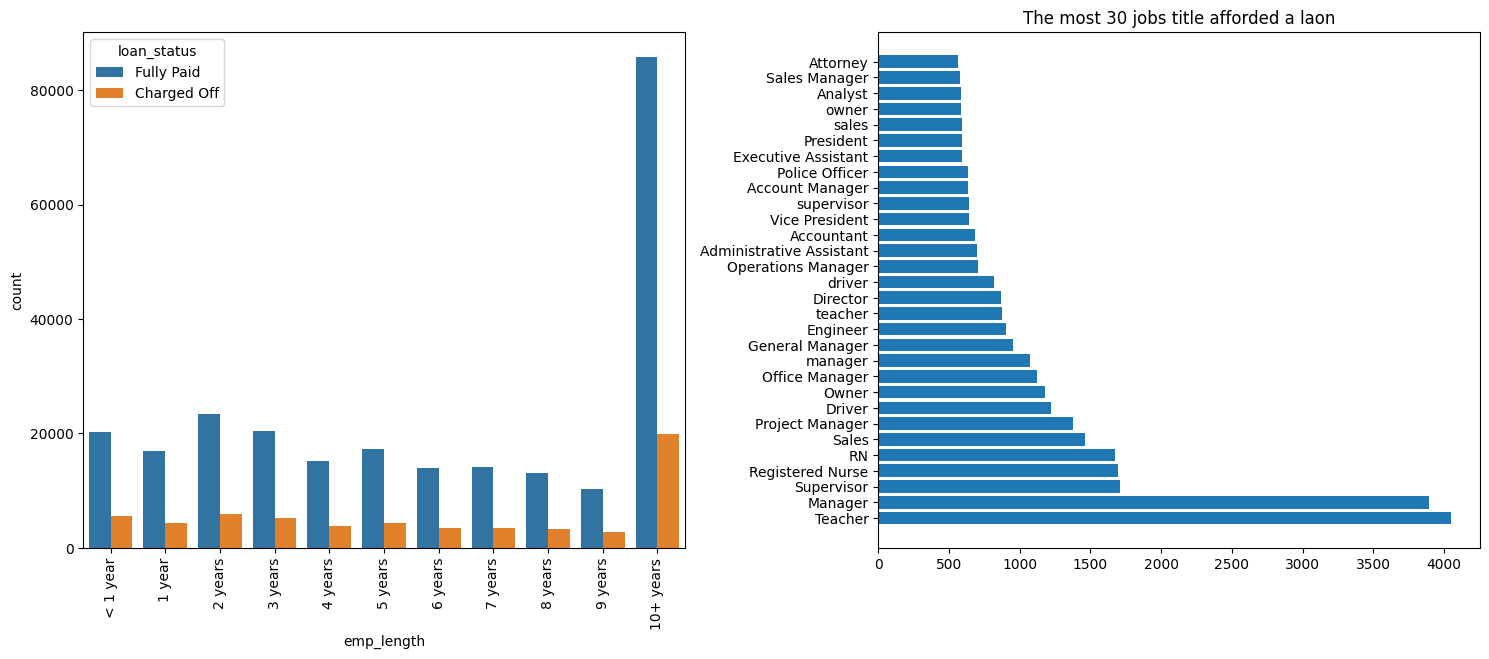

In [135]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g=sns.countplot(x='emp_length',data=df,hue='loan_status',order=order)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(2,2,2)
plt.barh(df.emp_title.value_counts()[:30].index,df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a laon")
plt.tight_layout()

plt.show()

**Insights**

Manager and Teacher are the most afforded loan on titles
Person who employed for more than 10 years has successfully paid of the loan

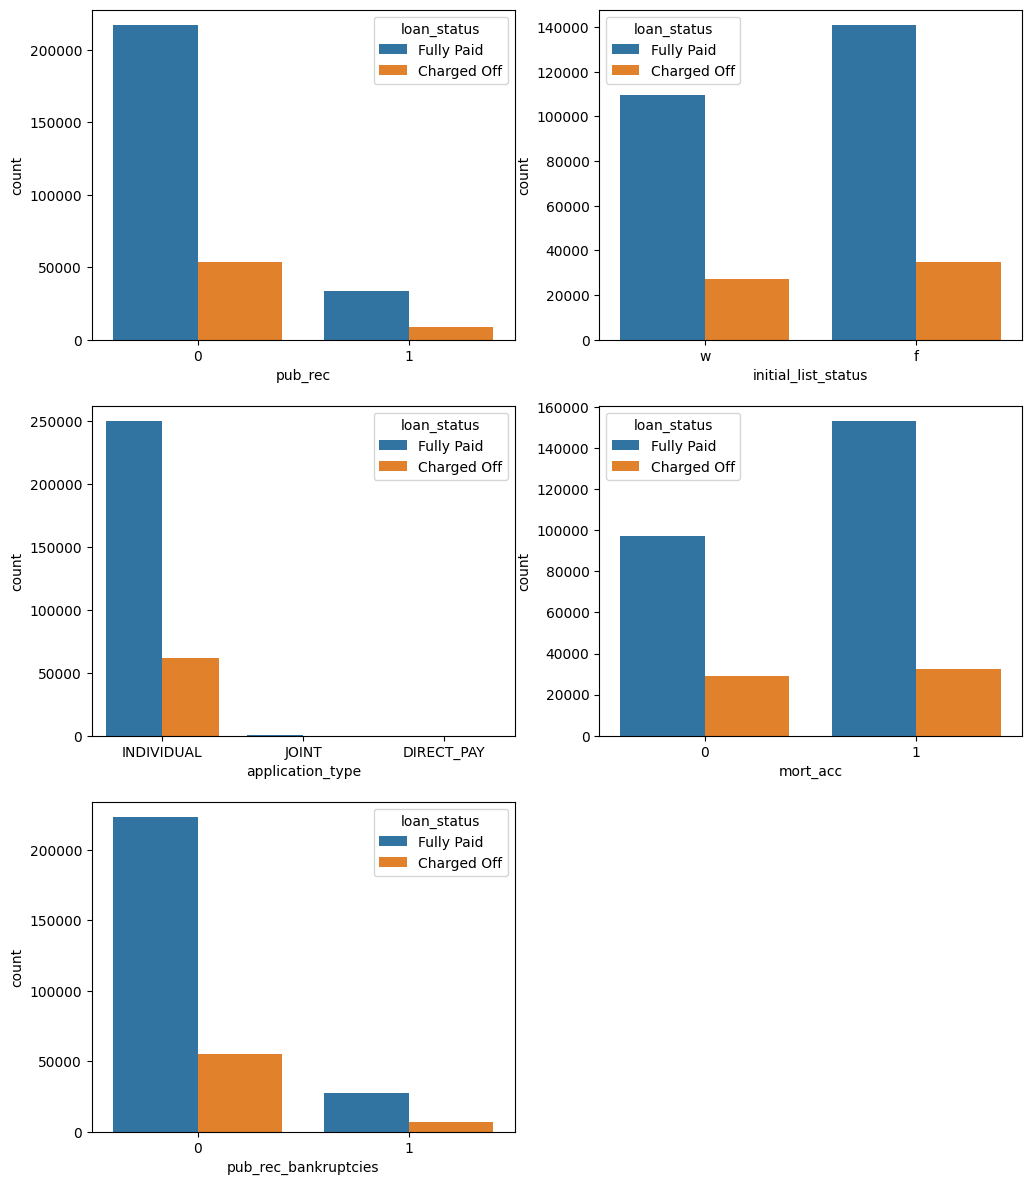

In [138]:
plt.figure(figsize=(12,30))

plt.subplot(6,2,1)
sns.countplot(x='pub_rec',data=df,hue='loan_status')

plt.subplot(6,2,2)
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

plt.subplot(6,2,3)
sns.countplot(x='application_type',data=df,hue='loan_status')

plt.subplot(6,2,4)
sns.countplot(x='mort_acc',data=df,hue='loan_status')

plt.subplot(6,2,5)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status')

plt.show()

**Insights**

Most the loan disbursed to the people whose do not hold bankrupties record have successfully paid loan

In [139]:
# Converting term values to numerical val
term_values={' 36 months': 36, ' 60 months':60}
df['term'] = df.term.map(term_values)

# Mapping the target variable
df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

# Initial List Status
df['initial_list_status'].unique()
np.array(['w', 'f'], dtype=object)
list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

# Let's fetch ZIP from address and then drop the remaining details -
df['zip_code'] = df.address.apply(lambda x: x[-5:])
df['zip_code'].value_counts(normalize=True)*100

70466    14.379560
30723    14.300730
22690    14.228628
48052    14.143068
00813    11.551908
29597    11.446800
05113    11.437187
93700     2.851366
11650     2.844316
86630     2.816437
Name: zip_code, dtype: float64

In [140]:
df['term'].unique()

array([36, 60])

# **Feature engineering**

In [136]:
def func1(number):
    if number == 0.0:
        return 0
    else:
        return 1

def func2(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [137]:
df['pub_rec']=df.pub_rec.apply(func1)
df['mort_acc']=df.mort_acc.apply(func2)
df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(func2)

**issue_d** can be divided into two columns of issue_month and issue_year

In [141]:
df[['issue_d']].head()

,issue_d
0,Jan-2015
1,Jan-2015
2,Jan-2015
3,Nov-2014
4,Apr-2013


In [142]:
df['issue_month'] = df['issue_d'].apply(lambda x : str(x).split('-')[0])
df['issue_year'] = df['issue_d'].apply(lambda x : str(x).split('-')[1])

In [143]:
df['issue_month'].unique()

array(['Jan', 'Nov', 'Apr', 'Sep', 'Oct', 'Jun', 'Dec', 'Jul', 'Feb',
       'Mar', 'May', 'Aug'], dtype=object)

In [144]:
# we dont want this col anymore or it will get in milticoleanirity
df = df.drop(columns=['issue_d'], axis=1)

**earliest_cr_line** can be divided into two columns of earliest_cr_line_month and earliest_cr_line_year

In [147]:
df[['earliest_cr_line']].head()

,earliest_cr_line
0,Jun-1990
1,Jul-2004
2,Aug-2007
3,Sep-2006
4,Mar-1999


In [148]:
df['earliest_cr_line_month'] = df['earliest_cr_line'].apply(lambda x : str(x).split('-')[0])
df['earliest_cr_line_year'] = df['earliest_cr_line'].apply(lambda x : str(x).split('-')[1])

In [149]:
df = df.drop(columns=['earliest_cr_line'], axis=1)

# **Outlier Detection and Removal**

In [126]:
univariate_cols = ['loan_amnt', 'int_rate',
       'annual_inc','dti','open_acc',
       'pub_rec', 'revol_bal','revol_util',
       'total_acc', 'mort_acc']

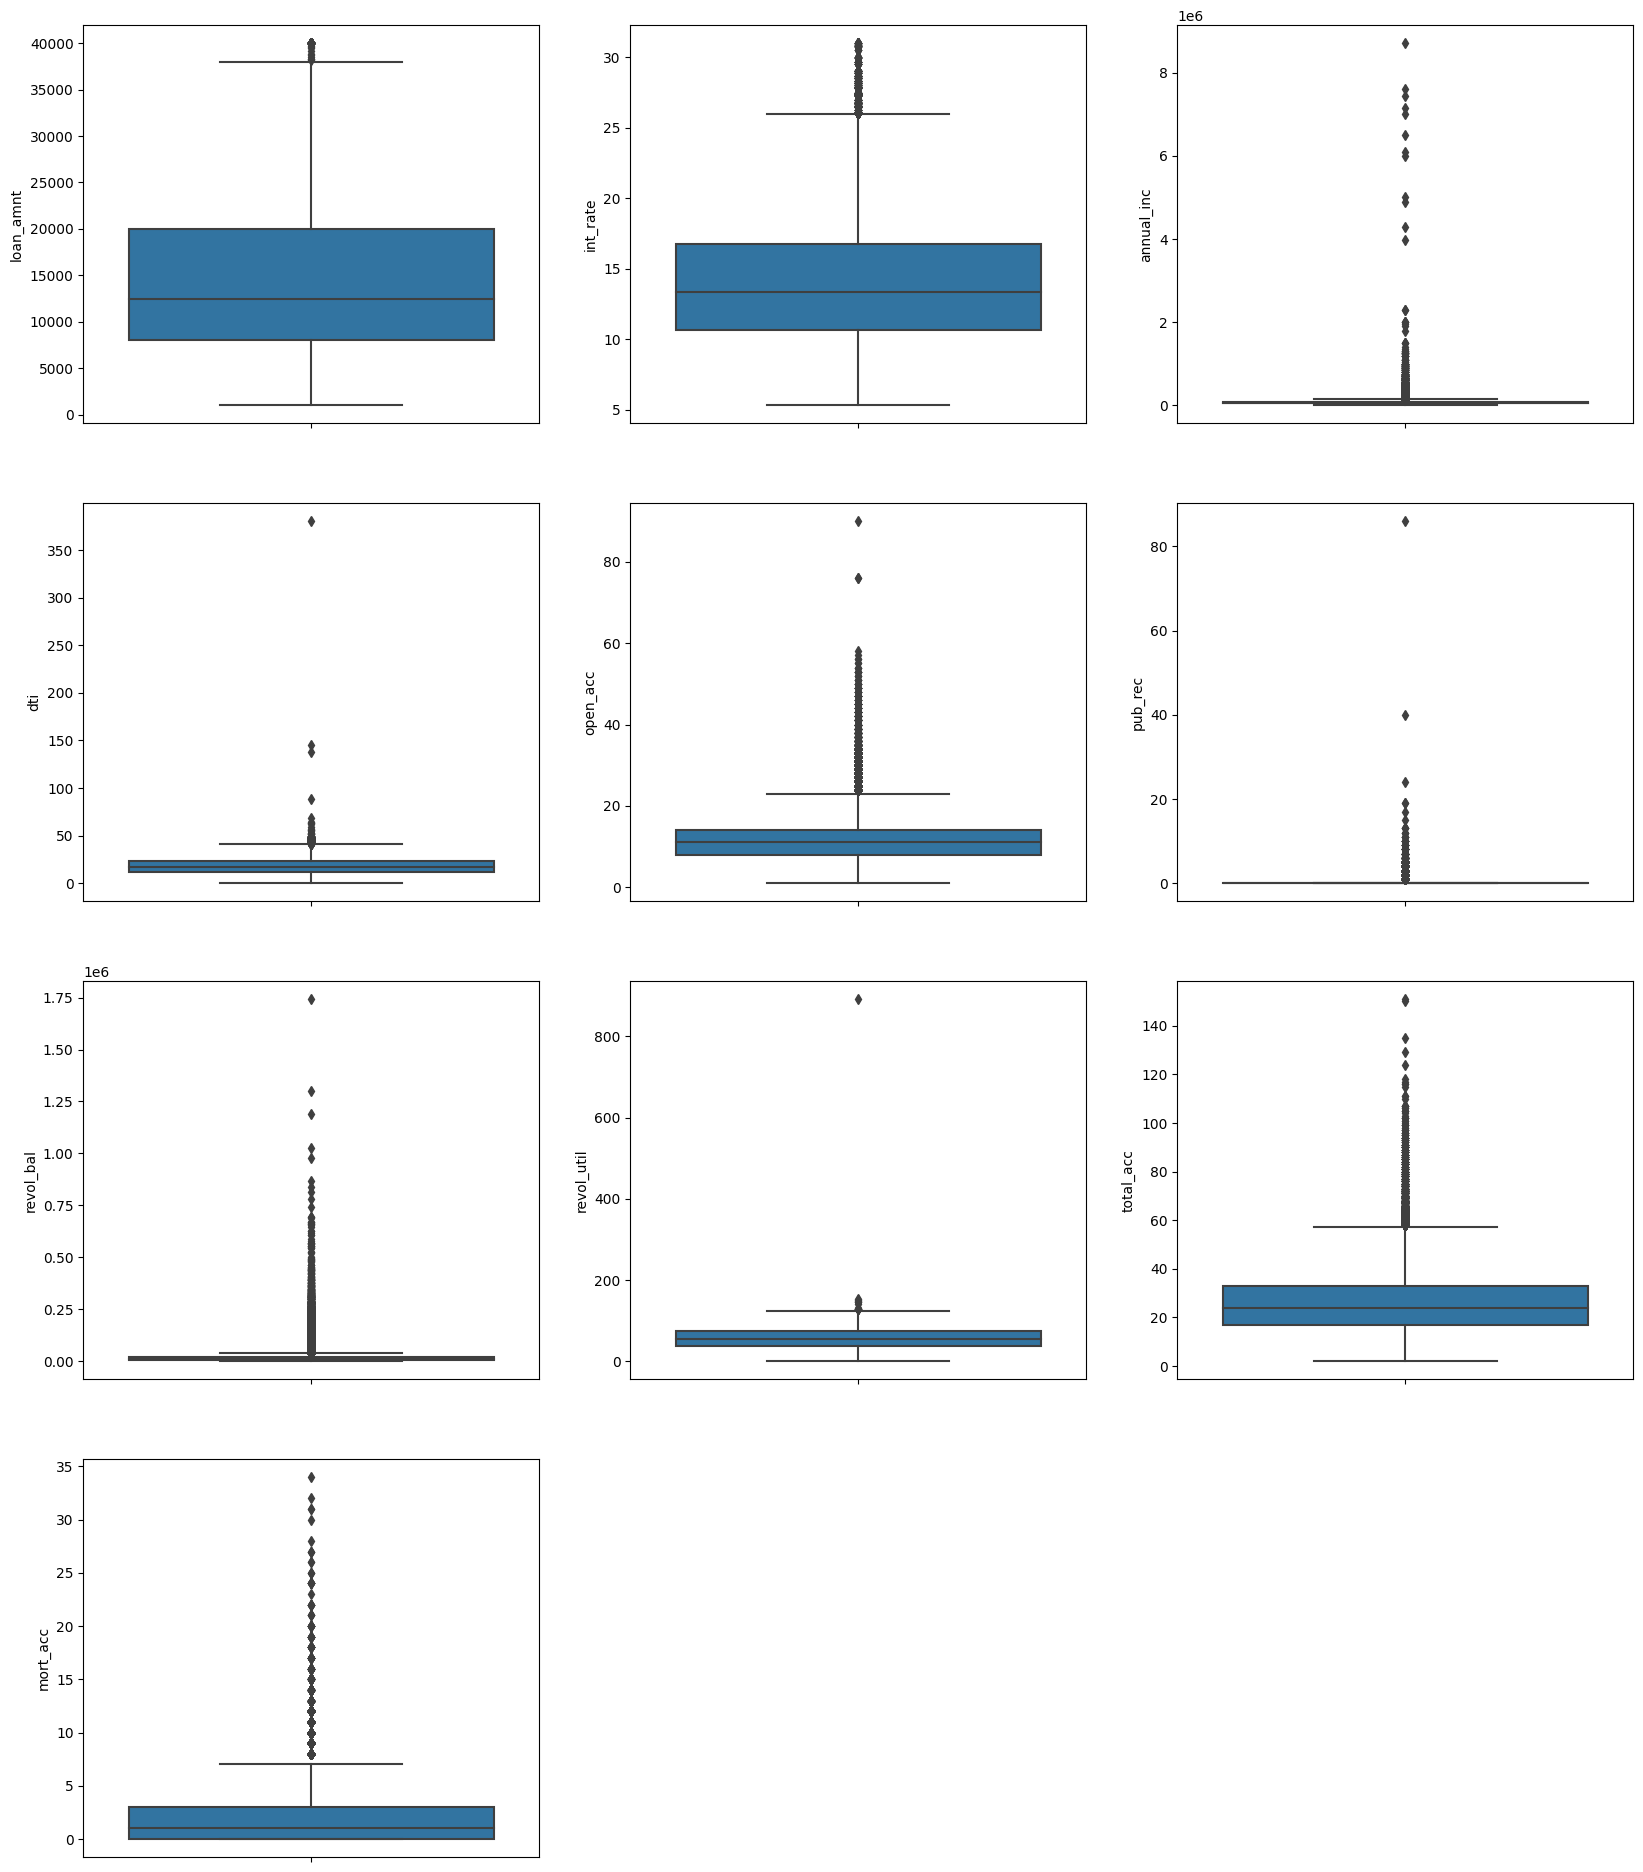

In [127]:
count = 0
plt.figure(figsize=(20,30))
for i in univariate_cols:
    count += 1
    plt.subplot(5,3,count)
    sns.boxplot(y= df[i])

From this analysis we come to know that we have a lot of outliers that have to treated, the best is IQR detection
and most of the col are left skewed. So have to be standardised.

From the box plot, we can see that there are lot of outliers which are lying outside 1.5 standard deviation hence we will take values within **3 standard devaiation**.

In [128]:
for col in univariate_cols:
    mean=df[col].mean()
    std=df[col].std()

    upper_limit=mean+3*std
    lower_limit=mean-3*std

    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]

df.shape

(312061, 26)

In [145]:
df['title'].nunique()


31053

In [146]:
# we cant encore this 30797 values that make no sense so it better to drop it
df = df.drop(columns=['title'], axis=1)

Some columns or features do not have any impact on target variable hence they can be removed.

In [150]:
# Dropping some variables which we can let go for now
df.drop(columns=[ 'zip_code','address'],
                   axis=1, inplace=True)

Finding Number of unique values for each column

In [151]:
for col in df.columns:
  print(col, '->', df[col].nunique())

loan_amnt -> 1383
term -> 2
int_rate -> 241
grade -> 7
sub_grade -> 35
emp_title -> 143141
emp_length -> 11
home_ownership -> 6
annual_inc -> 19887
verification_status -> 3
loan_status -> 2
purpose -> 13
dti -> 4045
open_acc -> 27
pub_rec -> 2
revol_bal -> 47298
revol_util -> 1135
total_acc -> 58
initial_list_status -> 2
application_type -> 3
mort_acc -> 2
pub_rec_bankruptcies -> 2
issue_month -> 12
issue_year -> 5
earliest_cr_line_month -> 12
earliest_cr_line_year -> 64


**Encoding catagorical columns**

**Label Encoding:** Label encoding is a technique used in machine learning and data analysis to convert categorical variables into numerical format. It is particularly useful when working with algorithms that require numerical input, as most machine learning models can only operate on numerical data.

In [152]:
label_encoder = LabelEncoder()

In [153]:
df['term'] = label_encoder.fit_transform(df['term'])
df['grade'] = label_encoder.fit_transform(df['grade'])
df['sub_grade'] = label_encoder.fit_transform(df['sub_grade'])
df['emp_length'] = label_encoder.fit_transform(df['emp_length'])
df['home_ownership'] = label_encoder.fit_transform(df['home_ownership'])
df['verification_status'] = label_encoder.fit_transform(df['verification_status'])
df['loan_status'] = label_encoder.fit_transform(df['loan_status'])
df['purpose'] = label_encoder.fit_transform(df['purpose'])
df['pub_rec'] = label_encoder.fit_transform(df['pub_rec'])
df['initial_list_status'] = label_encoder.fit_transform(df['initial_list_status'])
df['application_type'] = label_encoder.fit_transform(df['application_type'])
df['mort_acc'] = label_encoder.fit_transform(df['mort_acc'])
df['pub_rec_bankruptcies'] = label_encoder.fit_transform(df['pub_rec_bankruptcies'])
#df['ad_diccode'] = label_encoder.fit_transform(df['ad_diccode'])
#df['ad_dicpin'] = label_encoder.fit_transform(df['ad_dicpin'])
df['open_acc'] = label_encoder.fit_transform(df['open_acc'])
df['issue_month'] = label_encoder.fit_transform(df['issue_month'])
df['issue_year'] = label_encoder.fit_transform(df['issue_year'])
df['earliest_cr_line_month'] = label_encoder.fit_transform(df['earliest_cr_line_month'])
df['earliest_cr_line_year'] = label_encoder.fit_transform(df['earliest_cr_line_year'])

**Target Encoding:** A target encoding is any kind of encoding that replaces a feature's categories with some number derived from the target.

A simple and effective version is to apply a group aggregation like the mean.This kind of target encoding is sometimes called a mean encoding. Applied to a binary target, it's also called bin counting.

In [154]:
# target encoding
df_tenc = pd.DataFrame({'emp_title' : df['emp_title'], 'target' : df['loan_status']})
target_mean = df_tenc.groupby(by=['emp_title'])['target'].mean()
df['emp_title'] = df_tenc['emp_title'].map(target_mean)
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,0,11.44,1,8,0.240964,1,5,117000.0,0,...,41.8,25.0,0,1,0,0,4,3,6,40
1,8000.0,0,11.99,1,9,0.333333,4,1,65000.0,0,...,53.3,27.0,1,1,1,0,4,3,5,54
2,15600.0,0,10.49,1,7,0.200000,10,5,43057.0,1,...,92.2,26.0,1,1,0,0,4,3,1,57
3,7200.0,0,6.49,0,1,0.000000,6,5,54000.0,0,...,21.5,13.0,1,1,0,0,9,2,11,56
4,24375.0,1,17.27,2,14,1.000000,9,1,55000.0,2,...,69.8,43.0,1,1,1,0,0,1,7,49


In [155]:
df.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,...,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,issue_month,issue_year,earliest_cr_line_month,earliest_cr_line_year
0,10000.0,0,11.44,1,8,0.240964,1,5,117000.0,0,...,41.8,25.0,0,1,0,0,4,3,6,40
1,8000.0,0,11.99,1,9,0.333333,4,1,65000.0,0,...,53.3,27.0,1,1,1,0,4,3,5,54
2,15600.0,0,10.49,1,7,0.200000,10,5,43057.0,1,...,92.2,26.0,1,1,0,0,4,3,1,57
3,7200.0,0,6.49,0,1,0.000000,6,5,54000.0,0,...,21.5,13.0,1,1,0,0,9,2,11,56
4,24375.0,1,17.27,2,14,1.000000,9,1,55000.0,2,...,69.8,43.0,1,1,1,0,0,1,7,49


# **Data processing for modelling**

In order to perform Data preprocessing we will separate the target variable from the dataset and save in to a different variable.

Then, we will split the rest of the dataset into Training and tesing dataset.

**Training Dataset:** The training data is the biggest (in -size) subset of the original dataset, which is used to train or fit the machine learning model.

**Testing Dataset:** The test dataset is another subset of original data, which is independent of the training dataset

In [156]:
from sklearn.model_selection import train_test_split

X=df.drop('loan_status',axis=1)
y=df['loan_status']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)
print(X_train.shape)
print(X_test.shape)

(218442, 25)
(93619, 25)


**MinMax Scaler**: MinMax Scaler shrinks the data within the given range, usually of 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

In [157]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Model Building**

In [158]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Finding the Coefficients/Weights using Logrtihmic Regression model to the find the feature which has more impact in deciding the Target variable.

In [159]:
# X.columns.shape
# # logreg.coef_[0]
pd.Series((zip(X.columns, logreg.coef_[0])))

0                    (loan_amnt, 0.5883832505700248)
1                          (term, 0.426931227785869)
2                     (int_rate, -3.305577371825577)
3                       (grade, 0.07144638161088748)
4                     (sub_grade, 5.739813229261357)
5                     (emp_title, 8.677991841073693)
6                  (emp_length, 0.14666412233262663)
7              (home_ownership, 0.26745034550803026)
8                  (annual_inc, 0.09069281518913092)
9         (verification_status, 0.06497619899892079)
10                    (purpose, 0.00943683893864574)
11                          (dti, 1.020784193419477)
12                    (open_acc, 0.8582004938999441)
13                    (pub_rec, 0.13983570766793674)
14                  (revol_bal, -0.4508950932120839)
15                  (revol_util, 0.7754999228310131)
16                  (total_acc, -0.4294198972885948)
17        (initial_list_status, 0.08388559817290969)
18           (application_type, -1.23721241808

From the above list we can understand that, emp_title, sub_grade, int_rate, application_type and dti have very high impact on the Target variable.

In [160]:
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.888


**Stats Model**: Statsmodels is a Python module that provides classes and functions for the estimation of many different statistical models, as well as for conducting statistical tests, and statistical data exploration.

In [161]:
x_sm = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, x_sm)
result = sm_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:            loan_status   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     8512.
Date:                Thu, 21 Dec 2023   Prob (F-statistic):               0.00
Time:                        11:33:59   Log-Likelihood:                -34636.
No. Observations:              218442   AIC:                         6.932e+04
Df Residuals:                  218416   BIC:                         6.959e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0251      0.020     -1.246      0.2

# **Confusion Matrix**

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm

The confusion matrix consists of four basic characteristics (numbers) that are used to define the measurement metrics of the classifier. These four numbers are:

1. **TP (True Positive):** TP represents the number of patients who have been properly classified to have malignant nodes, meaning they have the disease.

2. **TN (True Negative):** TN represents the number of correctly classified patients who are healthy.

3. **FP (False Positive):** FP represents the number of misclassified patients with the disease but actually they are healthy. FP is also known as a Type I error.

4. **FN (False Negative):** FN represents the number of patients misclassified as healthy but actually they are suffering from the disease. FN is also known as a Type II error.

[[72986  2107]
 [ 8357 10169]]


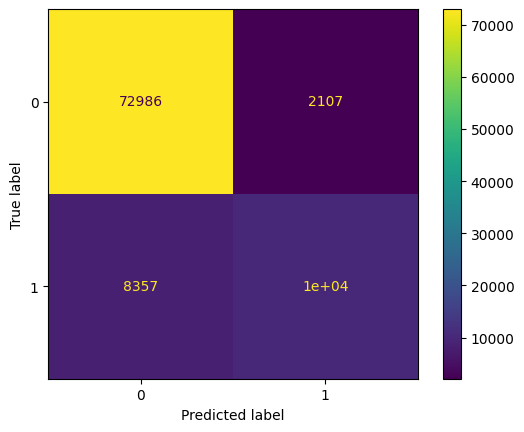

In [162]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=logreg.classes_).plot()

**Insight:**
There is significant value for false negative and false positive. Which will hamper our prediction due to type-1 or type-2 error.

# **Classification Report**

A classification report gives you a detailed breakdown of how well your model performs on each class, and how it balances the trade-off between precision and recall. It also shows you the number of instances (support) for each class, which can indicate the class imbalance or the size of the dataset.

**F1 score** is a machine learning evaluation metric that measures a model's accuracy. It combines the precision and recall scores of a model. The accuracy metric computes how many times a model made a correct prediction across the entire dataset

In [163]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93     75093
           1       0.83      0.55      0.66     18526

    accuracy                           0.89     93619
   macro avg       0.86      0.76      0.80     93619
weighted avg       0.88      0.89      0.88     93619



**Insights**

Model is doing decent job, since Precision score and recall score for full paid status is almost same indicates that  which correctly classified the both of the scenarios.

Precision score for charged off status is more than recall score which is perfect

# **ROC Curve**
An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

**True Positive Rate**

True Positive Rate (TPR) is a synonym for recall and is therefore defined as follows:

TPR=(TP)/(TP+FN)

**False Positive Rate**
False Positive Rate (FPR) is defined as follows:

FPR=(FP)/(FP+TN)


An ROC curve plots TPR vs. FPR at different classification thresholds. Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. The following figure shows a typical ROC curve.

**AUC (Area under the ROC Curve)** -
AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath the entire ROC curve (think integral calculus) from (0,0) to (1,1).

AUC provides an aggregate measure of performance across all possible classification thresholds. One way of interpreting AUC is as the probability that the model ranks a random positive example more highly than a random negative example. For example, given the following examples, which are arranged from left to right in ascending order of logistic regression predictions.

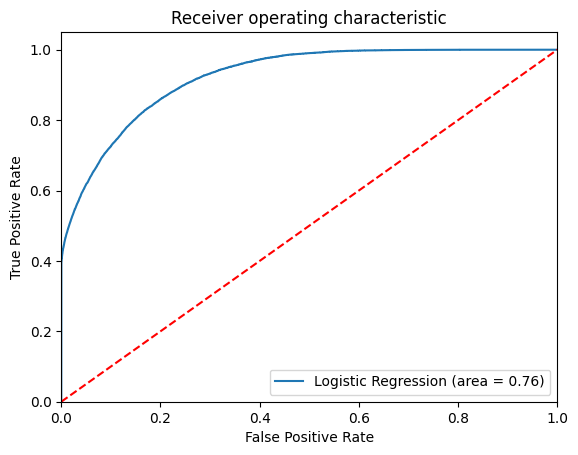

In [164]:
logit_roc_auc=roc_auc_score(y_test,logreg.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Insights**

Since,  ROC-AUC curve is grossing the **area near about 0.76** which indicates that model is performing well.
There is still room for some model improvement
By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.

# **Precision Recall Curve**

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate.

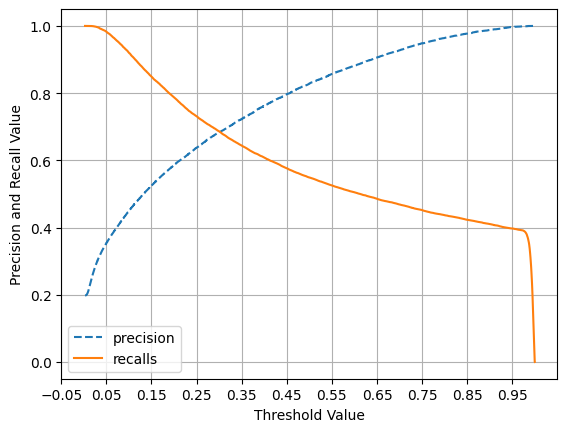

In [165]:
def precission_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)

    threshold_boundary = thresholds.shape[0]
    #plot precision
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    #plot recall
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recalls')

    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))

    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precission_recall_curve_plot(y_test,logreg.predict_proba(X_test)[:,1])

**Insights**

Precision score is highest at **0.30 threshold**. High precision value indicates that model is positevly predicating the charged off loan status which helps business to take more stable decision.

Recall score is higher on smaller threshold but after **0.30** the recall value is constant. Model is correctly classifying the actual predicated values as instances.


# **Assumption of Log. Reg. (Multicollinearity Check)**

**Multicollinearity check using Variance Inflation Factor (VIF)** -
Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model. Multicollinearity can be a problem in a regression model because we would not be able to distinguish between the individual effects of the independent variables on the dependent variable.

Multicollinearity can be detected via various methods. One such method is Variance Inflation Factor aka VIF. In VIF method, we pick each independent feature and regress it against all of the other independent features. VIF score of an independent variable represents how well the variable is explained by other independent variables.

VIF = 1/1-R2

In [166]:
def calc_vif(X):
    # Calculating the VIF
    vif=pd.DataFrame()
    vif['Feature']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

calc_vif(X)[:5]

,Feature,VIF
2,int_rate,407.60
4,sub_grade,245.48
18,application_type,187.12
3,grade,64.70
24,earliest_cr_line_year,58.98


We are dropping the columns for which teh VIF is too high.

In [167]:
X.drop(columns=['int_rate'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
17,application_type,105.68
3,sub_grade,89.62
2,grade,64.66
23,earliest_cr_line_year,58.63
15,total_acc,13.26


In [168]:
X.drop(columns=['application_type'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
3,sub_grade,88.98
2,grade,63.94
22,earliest_cr_line_year,26.43
15,total_acc,12.82
11,open_acc,12.09


In [169]:
X.drop(columns=['sub_grade'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
21,earliest_cr_line_year,25.85
14,total_acc,12.82
10,open_acc,12.08
13,revol_util,8.91
6,annual_inc,8.25


In [170]:
X.drop(columns=['earliest_cr_line_year'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
14,total_acc,12.74
10,open_acc,11.56
6,annual_inc,8.11
9,dti,8.02
13,revol_util,7.98


In [171]:
X.drop(columns=['total_acc'], axis=1, inplace=True)
calc_vif(X)[:5]

,Feature,VIF
13,revol_util,7.98
6,annual_inc,7.88
9,dti,7.84
10,open_acc,7.39
0,loan_amnt,7.33


**K-fold cross-validation:**

K-fold cross-validation is a technique for evaluating predictive models. The dataset is divided into k subsets or folds. The model is trained and evaluated k times, using a different fold as the validation set each time. Performance metrics from each fold are averaged to estimate the model’s generalization performance. This method aids in model assessment, selection, and hyperparameter tuning, providing a more reliable measure of a model’s effectiveness.

In [173]:
X=scaler.fit_transform(X)

kfold=KFold(n_splits=5)
accuracy=np.mean(cross_val_score(logreg,X,y,cv=kfold,scoring='accuracy',n_jobs=-1))
print("Cross Validation accuracy : {:.3f}".format(accuracy))

Cross Validation accuracy : 0.888


**SMOTE (Oversampling):**

SMOTE is an oversampling technique that generates synthetic samples from the minority class. It obtains a synthetically class-balanced or nearly class-balanced training set, then trains the classifier.

In [174]:
sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())

In [182]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}\n".format(sum(y_train == 0)))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (350428, 25)
After OverSampling, the shape of train_y: (350428,) 

Before OverSampling, counts of label '1': 43228
Before OverSampling, counts of label '0': 175214

After OverSampling, counts of label '1': 175214
After OverSampling, counts of label '0': 175214


**Before Oversampling**, the number of samples for Category 1 are 43228 and number of samples in category 0 are 175214.

However **after Oversampling** we can see, that now the number of samples for Category 1 are equal to number of samples in category 0 i.e. 175214

In [176]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)

# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.94      0.85      0.90     75093
           1       0.57      0.80      0.67     18526

    accuracy                           0.84     93619
   macro avg       0.76      0.82      0.78     93619
weighted avg       0.87      0.84      0.85     93619



**Insights**

After making the dataset balanced, the precision and recall score are same as imbalanced dataset. But the accuracy dropped.
There is still room for improvement.

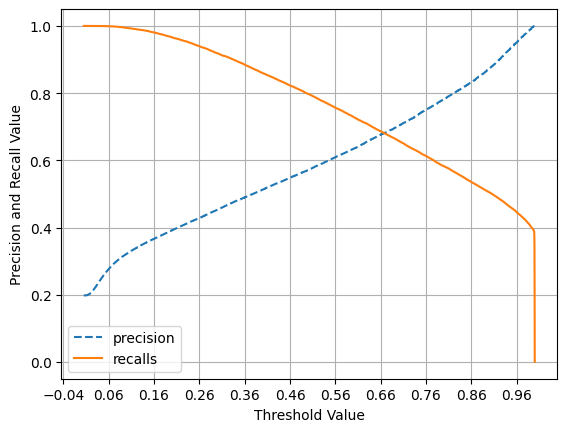

In [177]:
precission_recall_curve_plot(y_test, lr1.predict_proba(X_test)[:,1])

**Insights**

After balancing the dataset, there is significant change observed in the precion and recall score for both of the classes.
Precision score is .95 and .49 for full paid and charged off respectively.

# **Questions in the Case Study:**

1. What percentage of customers have fully paid their Loan Amount?

In [178]:
df ['loan_status'].value_counts(normalize=True)*100

0    80.21092
1    19.78908
Name: loan_status, dtype: float64

**Answer**: 80 percent of customers have fully paid the loan amount

2. Comment about the correlation between Loan Amount and Installment features.

**Answer:** The spearman correlation coefficient between Loan Amount and Installmen is very high (i.e. 0.97)

3. The majority of people have home ownership as _______.

In [179]:
df ['home_ownership'].value_counts(normalize=True)*100

1    49.958181
5    40.871496
4     9.151416
3     0.009614
2     0.008973
0     0.000320
Name: home_ownership, dtype: float64

In [180]:
df['home_ownership'].value_counts()

1    155900
5    127544
4     28558
3        30
2        28
0         1
Name: home_ownership, dtype: int64

Answer: Since category 1 is associated with 'Mortgage', hence ajority of people have home ownership are from Mortgage category

4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
**Answer -** True.

Out of all people with grade 'A', 93% got their loan approved.

5. Name the top 2 afforded job titles.
**Answer -** Teacher & Manager

6. Thinking from a bank's perspective, which metric should our primary focus be on..
ROC AUC Precision Recall F1 Score

**Answer -** It should be on f1 score. as we need to give importance to both precision and recall. We don't want to miss potential customers and at the same time we also don't want to give loan to defaulters

7. How does the gap in precision and recall affect the bank?
**Answer -** Recall score: 0.94 and Precision score: 0.85. Which tells us that there are more false positives than the false negatives.

From Confusion Matrix it can be seen that FP = 10% of total cases & FN = 0.9% of Total Cases

If Recall value is low (i.e. FN are high), it means Bank is loosing in opportunity cost.

If Precision value is low (i.e. FP are high), it means Bank's NPA (defaulters) may increase.

8. Which were the features that heavily affected the outcome?
**Answer -** Using RFE we were able to identify top_20 features which has high impact on Outcome. This include:

int_rate: Interest Rate

sub_grade: loan subgrade

term : number of payments on the loan

home_ownership

purpose

application_type

pincode (from address)

emp_title: job title supplied by the Borrower

9. Will the results be affected by geographical location? (Yes/No)
pincode (derived from address) has significant impact on the outcome.

How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

**Answer -** Since data is imbalances by making the data balance we can try to avoid false positives. For evaluation metrics, we should be focusing on the macro average f1-score because we don't want to make false positive prediction and at the same we want to detect the defualers. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone

**Answer -** Below are the most features and their importance while making the prediction. So these variables can help the managers to identify which are customers who are more likely to pay the loan amount fully,

# **Tradeoff Questions:**
1. How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

**Answer:** Since data is imbalances by making the data balance we can try to avoid false positives. For evaluation metrics, we should be focusing on the macro average f1-score because we don't want to make false positive prediction and at the same we want to detect the defualers.

2. Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone

**Answer:**  Below are the most features and their importance while making the prediction. So these variables can help the managers to identify which are customers who are more likely to pay the loan amount fully,

# **Actional Insights and Recommendations**

1.	Accuracy of Logistic Regression Classifier on test set: 0.888 which is decent and not by chance.

2.	The organization can the trained model to make prediction for whether a person will likely to pay the loan amount or he will be a defaulter.

3.	By collecting more data, using a more complex model, or tuning the hyperparameters, it is possible to improve the model's performance.

4.	Cross Validation accuracy and testing accuracy is almost same which infers model is performing the decent job. We can trust this model for unseen data

5.	80% of the customers have paid the loan fully.

6.	20% of the customers are the defaulters.

7.	ROC AUC curve area of 0.76, the model is correctly classifying about 76% of the instances. This is a good performance, but there is still room for improvement.

8.	The precision-recall curve allows us to see how the precision and recall trade-off as we vary the threshold. A higher threshold will result in higher precision, but lower recall, and vice versa. The ideal point on the curve is the one that best meets the needs of the specific application.

9.	After balancing the dataset, there is significant change observed in the precion and recall score for both of the classes.


